# Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful linear algebra technique that decomposes any real-valued matrix  *$X_{m \times n}$*  into three matrices:
# 
$
 X = U D V^T
$

## where:
- *$U$*: Left singular vectors (matrix of size m $\times$ n)
- *D*: Diagonal matrix of singular values (size n $\times$ n)
- *$V^T$*: Right singular vectors (matrix of size n $\times$ n)
# 
## SVD is useful for:
- **Clustering**
- **Dimensionality Reduction**
- **Noise Reduction**
- **Data Compression**

<div class="alert alert-block alert-warning">
<b>Tip:</b> Please note that the method above and the dimension of the matrices associated with the SVD economy method or reduced SVD, where the data points with zero singular values are removed. 
</div>

# How

Each matrix in SVD represents a specific action. The *U* and *$V^T$* represent a rotation action while the *D* represents a Stretching. The rotation process is facilitated via the special property of these two matrices. 

## E1: 

What is the most important property of these matrices?

> **Answer to E1:** 
>
> They both are [unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix).
>
> $U^TU$ = $UU^T$ = I 
> 
> $V^TV$ = $VV^T$ = I  

## E2: 

What is the minimum requirement for a matrix to be invertible? Please try to calculate the inverse of the below matrix.

In [51]:
using ACS 

X = [5 -1 1; 5 7 10]'

3×2 adjoint(::Matrix{Int64}) with eltype Int64:
  5   5
 -1   7
  1  10

In [52]:
inv(X)

DimensionMismatch: DimensionMismatch: matrix is not square: dimensions are (2, 3)

> [!NOTE]
> 
> You will need a square matrix to be able to calculate its inverse. Please note that if you use *pinv(-)* rather than *inv(-)* the algorithm is actually calculating the inverse of *$inv(X^TX) \times X^T$* and not inv(*X*).

In [53]:
pinv(X) .- inv(X'*X)*X'

2×3 Matrix{Float64}:
 -8.32667e-17  -5.55112e-17  -6.93889e-17
 -2.0383e-17    4.16334e-17   2.08167e-17

<div class="alert alert-block alert-info">
<b>Note:</b> You will need to be able to calculate the inverse of a matrix in order to be able to calculate its eigenvalues values and eigenvectors.
</div>

The SVD problem can be divided into two simple equations: 

- $$X^T X = VD^TDV^T$$ 
- $$XV = UD $$

## E3: 

Let's calculate the $X^TX$.

In [54]:
XTX = X'*X

2×2 Matrix{Int64}:
 27   28
 28  174

For the second half the first equation we need to calculate the eigenvalues values and eigenvectors of the $X^TX$: 

$$D = \sqrt{eigenvalues(X^TX)} $$ 

$$V = eigenvector(X^TX) $$

## E4: 

Let's calculate the *D* and *V* for the matrix *X*. 

In [55]:
D = sqrt.(eigvals(XTX))

2-element Vector{Float64}:
  4.6741076485405415
 13.38479427148041

In [56]:
V = eigvecs(XTX)

2×2 Matrix{Float64}:
 -0.983486  0.180987
  0.180987  0.983486

## E5: 

How can we calculate U?

> Answer to E5:
>
> $$U = XVD^{-1} $$

In [57]:
U = X * V * inv(diagm(D))

3×2 Matrix{Float64}:
 -0.858452  0.434998
  0.481459  0.500823
  0.1768    0.7483

## E6: 

Let's reconstruct the matrix *X*.

In [58]:
X_hat = U * diagm(D) * V'

3×2 Matrix{Float64}:
  5.0   5.0
 -1.0   7.0
  1.0  10.0

<div class="alert alert-block alert-success">
<b>Proof:</b> As you can see the matrices X and X_hat are exactly the same, proving that a matrix X with real numbers can be decomposed into three distinct matrices..
</div>

<div class="alert alert-block alert-warning">
<b>Tip:</b> Please note that the method provided above is adequate for very small matrices. This solution is unique, even though expensive. For larger systems there are different approximation algorithms to decompose matrices of interest.
</div>

There is an efficient and accurate algorithms built in julia language for doing such calculations quickly, such as the function [svd(-)](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.svd) within the LinearAlgebra package available through ACS.jl.

## E7: 

Can you compute the SVD of the matrix *X* using the built in function svd(-)? What is in the output and are there any differences in the results? If yes, are they important?

In [59]:
out = svd(X)

SVD{Float64, Float64, Adjoint{Float64, Matrix{Float64}}, Vector{Float64}}
U factor:
3×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.434998   0.858452
 0.500823  -0.481459
 0.7483    -0.1768
singular values:
2-element Vector{Float64}:
 13.384794271480407
  4.674107648540542
Vt factor:
2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.180987   0.983486
 0.983486  -0.180987

> Answer to E7: 
>
> You get the matrices *U* and *$V^{T}$* as well as the vector of singular values. The vector os singular values is sorted from the largest to the smallest, which was not the case for manual calculation of SVD. Also the sign of a few values are inverted. However, these inversions do not impact the results at all. They are caused by the algorithm behind the calculations.

## E8: 

Let's try to do the same thing for a larger simulated matrix, for example a matrix of random numbers of 50 by 20. 

```julia 
A = -10 .+ (30 .* rand(50, 20))

```

In [60]:
A = -10 .+ (30 .* rand(50, 20))
out1 = svd(A)
out1.S 

20-element Vector{Float64}:
 179.08532008459702
  90.98461183776176
  80.91570640397907
  76.3261735076104
  74.68439026960625
  72.01414159118589
  71.13906940568793
  65.17778663217878
  63.085344796713905
  59.62887630519757
  57.222091155083696
  53.428044576266394
  50.64303826870276
  48.95005314165589
  44.12114228358156
  41.403994559709666
  35.49265512224551
  31.798859962251512
  30.641236754900962
  24.634105612073327

## E9: 

How do you calculate the variance explained by each singular value?

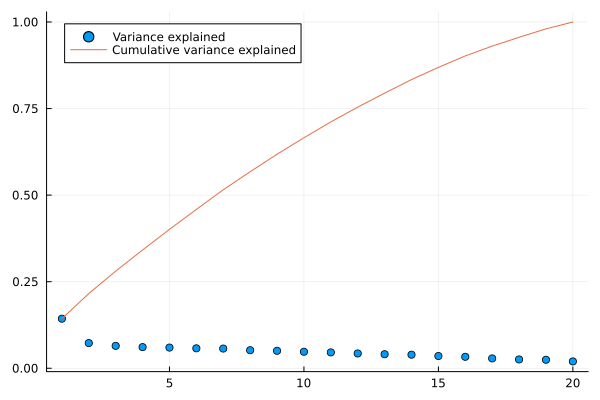

In [61]:
var_exp = out1.S ./ sum(out1.S)
var_exp_cum = cumsum(var_exp)

scatter(1:20, var_exp, label="Variance explained")
plot!(1:20, var_exp_cum, label="Cumulative variance explained")

# SVD in practice

## Clustering

As mentioned before SVD can be used for clustering of different measurements similar to [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis). Please note that some of the existing PCA algorithms use SVD as their kernel. 

## E10 

Let's perform SVD on the Iris dataset. 

```julia 

data = dataset("datasets", "iris")
describe(data) # Summarizes the dataset

```

In [62]:
# Conversion of the data to a matrix

data = dataset("datasets", "iris")
Y = data[!,"Species"]
X = Matrix(data[:,1:4]); # The first four columns are selected for this example
m = svd(X)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
150×4 Matrix{Float64}:
 -0.0616168   0.129611    0.0021386    0.00163819
 -0.0580709   0.11102     0.0706724    0.051757
 -0.056763    0.117966    0.00434255   0.00955702
 -0.0566534   0.105308    0.00592467  -0.0416439
 -0.0612302   0.13109    -0.0318811   -0.0322148
 -0.0675032   0.130885   -0.0685372   -0.0113642
 -0.0574821   0.116598   -0.0664137   -0.0267434
 -0.0609726   0.120943    0.00543027  -0.0240567
 -0.0537612   0.0999415   0.0176366   -0.0165154
 -0.0588267   0.112043    0.0649689   -0.030472
  ⋮                                   
 -0.0975766  -0.0421663  -0.0477535    0.269324
 -0.0866823  -0.0643397  -0.0672473   -0.0101401
 -0.101467   -0.0726079  -0.0954496    0.0314228
 -0.100361   -0.0670195  -0.157083     0.128363
 -0.0961497  -0.0524346  -0.0589711    0.226609
 -0.0892692  -0.0585064   0.0460294    0.134135
 -0.0940593  -0.0498297  -0.04144      0.0728945
 -0.0948896  -0.0561012  -0.212978     0.02

## E11

Are there clear clusters visible in the data?

> Answer to E11: 
>
> We can plot the *U[:,1]* vs *U[:,2]* while coloring the dots based on the plant species. We can see that the first two of columns of the *U* represent more than 95$\%$ of the variance in the data. 

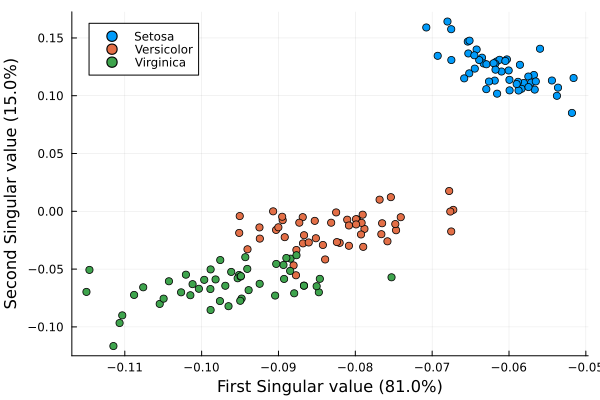

In [63]:
var_exp = m.S ./ sum(m.S) # diag() selects the diagonal values in a matrix
scatter(m.U[:,1],m.U[:,2],label=["Setosa" "Versicolor" "Virginica"], group = data[!,"Species"])
p1 = round(100*var_exp[1],digits=0)
p2 = round(100*var_exp[2],digits=0)
xlabel!("First Singular value ($p1%)")
ylabel!("Second Singular value ($p2%)")


## E12:

Can we define separation boundaries of the three clusters in the *U1* and *U2* space? 

> Answer to E12 
>
> For Setosa *U2* values larger than 0.05 may be a separation point. On the other hand between the other two types the separation would be for *U2* values $\leq$ -0.04.
> 

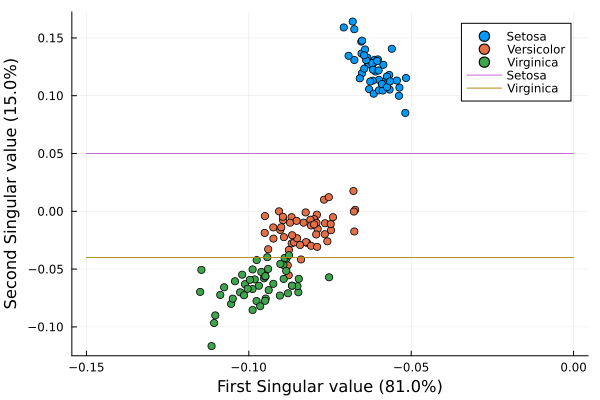

In [64]:
scatter(m.U[:,1],m.U[:,2],label=["Setosa" "Versicolor" "Virginica"], group = data[!,"Species"])
plot!([-0.15,0],[0.05,0.05],label="Setosa")
plot!([-0.15,0],[-0.04,-0.04],label="Virginica")
xlabel!("First Singular value ($p1%)")
ylabel!("Second Singular value ($p2%)")

## E13: 

Can we randomly select 10 cases and predict the flower type based on the four variables of and our SVD model?

```julia 

n = 10 # number of points to be selected

rand_ind = rand(1:size(X,1),n) # generate a set of random numbers between 1 and size(X,1)

``` 

In [65]:
n = 10 # number of points to be selected

rand_ind = rand(1:size(X,1),n) # generate a set of random numbers between 1 and size(X,1)
X_1 = X[rand_ind,:] # select the rows of X corresponding to the random indices
# U = X * V * inv(diagm(D))
U_ = X_1 * m.V * inv(diagm(m.S))

10×4 Matrix{Float64}:
 -0.0884306  -0.0409564   -0.00807559   0.0777388
 -0.0792555  -0.0200199    0.0122193   -0.0539719
 -0.0940593  -0.0498297   -0.04144      0.0728945
 -0.0615456   0.101783    -0.0304264   -0.160123
 -0.0969165  -0.0644162   -0.217405     0.029063
 -0.0626032   0.112292    -0.0778558    0.0931682
 -0.0635147   0.132921    -0.0736188   -0.0344734
 -0.0876667  -0.033443    -0.129645    -0.0406524
 -0.0872878  -0.00984645  -0.117995    -0.060559
 -0.0976169  -0.0776396   -0.0827303   -0.000360399

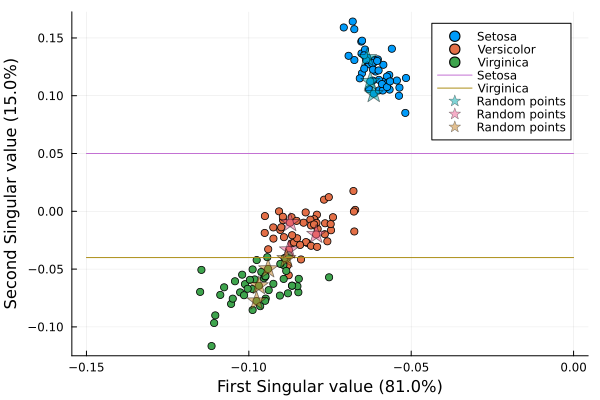

In [66]:
scatter(m.U[:,1],m.U[:,2],label=["Setosa" "Versicolor" "Virginica"], group = data[!,"Species"])
plot!([-0.15,0],[0.05,0.05],label="Setosa")
plot!([-0.15,0],[-0.04,-0.04],label="Virginica")
xlabel!("First Singular value ($p1%)")
ylabel!("Second Singular value ($p2%)")
scatter!(U_[:,1],U_[:,2],label="Random points",group =data[rand_ind,"Species"],marker=:star,ms=10,alpha=0.5)

<div class="alert alert-block alert-info">
<b>Note:</b> Use blue boxes (alert-info) for tips and notes. 
As you can see in the plot above, as expected, the randomly selected datasets land exactly on top of the original data, indicating a correct prediction. It should be noted that normally, not all the data is used for the model building. A portion of data is usually left for testing and validation while building the model..
</div>

## Dimension reduction

SVD can also be used for the dimension reduction of large datasets. The dimension reduction either helps removing certain variables or generates a set of new variables that are linear combination of the original ones. 

## E14: 

What are the variables with the highest level of information to form the above clusters for the Iris data set?

> Answer to E14
>
> We need to look at the rows of *Vt*. Each row there represents "loadings"/weights associated with each variable and/or singular value. For example for the first SV all the loadings are negative, indicating a negative relationship between the model projection (i.e. *U*) and all the four variables. The magnitude of each loading is indicative of the variable importance. In this case for *U1* variables one and three are the most important ones while for the *U2* variables three and two are the most relevant ones. 
>  

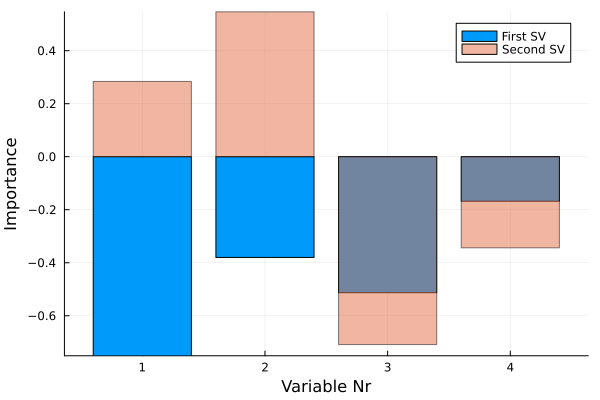

In [67]:
bar(m.Vt[1,:],label="First SV")
bar!(m.Vt[2,:],label="Second SV",alpha = 0.5)
xlabel!("Variable Nr")
ylabel!("Importance")

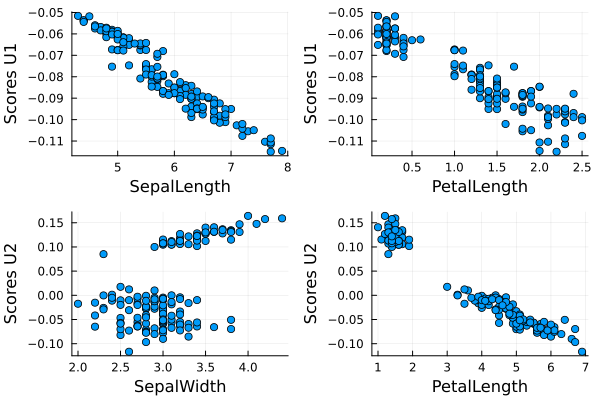

In [68]:
p1 = scatter(X[:,1],m.U[:,1],label=false)
xlabel!("SepalLength")
ylabel!("Scores U1")

 p2 = scatter(X[:,4],m.U[:,1],label=false)
xlabel!("PetalLength")
ylabel!("Scores U1")

 p3 = scatter(X[:,2],m.U[:,2],label=false)
xlabel!("SepalWidth")
ylabel!("Scores U2")

p4 = scatter(X[:,3],m.U[:,2],label=false)
xlabel!("PetalLength")
ylabel!("Scores U2")

plot(p1,p2,p3,p4,layout = (2,2))

<div class="alert alert-block alert-success">
<b>Proof:</b> As you can see in the below figure using the two variables with the highest loadings values. We were able to identify these taking advantage of the loading plots. 
</div>

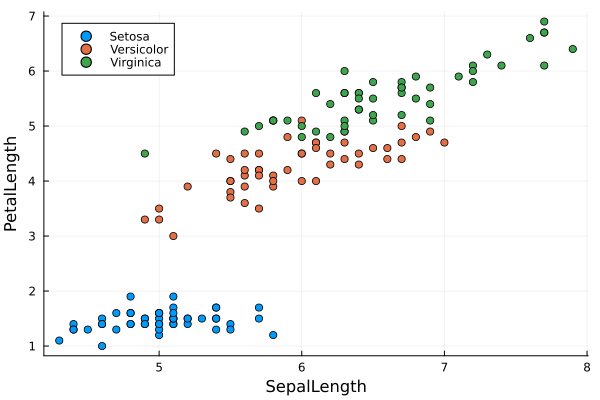

In [69]:
scatter(X[:,1],X[:,3],label=["Setosa" "Versicolor" "Virginica"], group = data[!,"Species"])
xlabel!("SepalLength")
ylabel!("PetalLength")

## E15:

The dimension reduction is particularly helpful for solving regression problems where there are many variables. Let's imagine a case where we have 100 measurements and 50 variables. We would like to use the minimum number of variables to predict the target *Y*. 


In [70]:
# data generation
# Generate synthetic dataset (100 samples, 50 features)
n_samples = 100
n_features = 50
# Create correlated feature matrix (random linear combinations)
X = randn(n_samples, n_features) * randn(n_features, n_features)  # Introduce correlation
# Generate target variable with some noise
b = randn(n_features)  # True coefficients
y = X * b + 0.01 * randn(n_samples);  # Linear relationship with noise

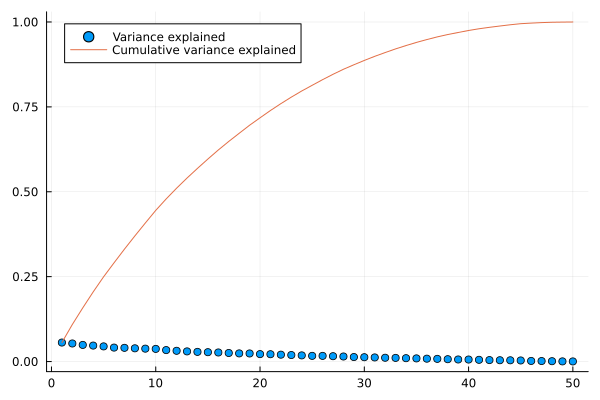

In [71]:
# Perform Singular Value Decomposition (SVD)
U, S, Vt = svd(X)

# compute variance explained
var_exp = S ./ sum(S)
var_exp_cum = cumsum(var_exp)
scatter(1:n_features, var_exp, label="Variance explained")
plot!(1:n_features, var_exp_cum, label="Cumulative variance explained")

Given that we want to have minimum number of variables, we can choose 12 SV representing around 50% of variance in the data. At this point we treat this as a simple least square problem where the first 12 columns of *U* are our *X* and *Y* remains as it was. 

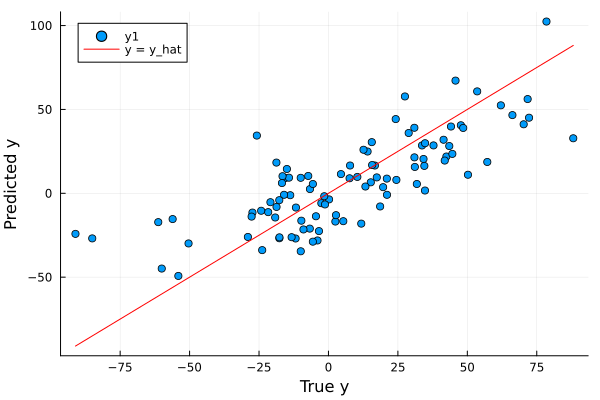

In [72]:
b_h = pinv(transpose(U[:,1:12]) * U[:,1:12]) * transpose(U[:,1:12]) * y # simple least square solution
y_hat = U[:,1:12] * b_h # prediction the y_hat

scatter(y,y_hat)
plot!([minimum(y),maximum(y)],[minimum(y),maximum(y)],label="y = y_hat",color=:red)
xlabel!("True y")
ylabel!("Predicted y")  # The first 12 columns are selected for this example

In this example with around 20% of the variables we are able to reasonably predict *Y*, showing the power of SVD in capturing the underlying trends in a dataset. 

<div class="alert alert-block alert-info">
<b>Note:</b> Use blue boxes (alert-info) for tips and notes. 
Each SV in the SVD, represent a very specific underlying trend in the data. These trends may not be visible when looking at the actual variables. For example in case of Iris dataset the two variables SepalLength vs SepalWidth have a one to two relationship, which is very difficult to observe. SVD is able to capture this trend in the first SV.  
</div>

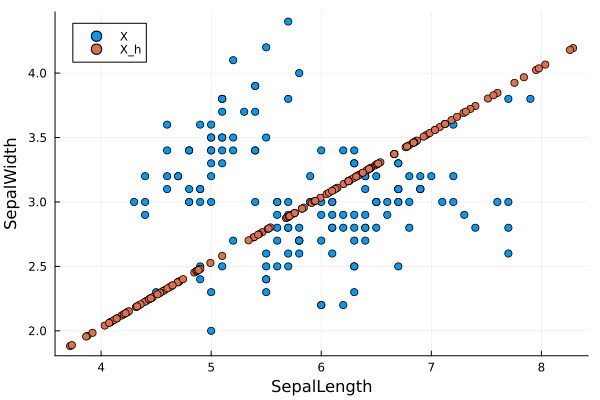

In [73]:
D_temp = m.S
D_temp[2:end] .= 0
D_n = diagm(D_temp) # the new singular value matrix
X_h  = m.U * D_n * m.Vt # the reconstructed matrix
scatter(data[:,1],data[:,2],label="X")
scatter!(X_h[:,1],X_h[:,2],label="X_h")
xlabel!("SepalLength")
ylabel!("SepalWidth")

## E16: 

Load the mtcars dataset and perform SVD on that. What are the main underlying trends in the data. Compare the results of the analysis with and without mean centering and scaling

```julia 

data = read_ACS_data(“mtcars.csv”)

```